<a href="https://colab.research.google.com/github/cubecloud/fool_game/blob/feature-02-np-exp/fool_game_and_q_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### New Import

In [1]:
!pip install git+https://github.com/cubecloud/fool_game.git@feature-02-np-exp
# !git clone --branch='feature-02-np-exp'  https://github.com/cubecloud/fool_game.git
# !pip install /content/fool_game/

  Cloning https://github.com/cubecloud/fool_game.git (to revision feature-02-np-exp) to /tmp/pip-req-build-izq9mfta
  Running command git clone -q https://github.com/cubecloud/fool_game.git /tmp/pip-req-build-izq9mfta
  Running command git checkout -b feature-02-np-exp --track origin/feature-02-np-exp
  Switched to a new branch 'feature-02-np-exp'
  Branch 'feature-02-np-exp' set up to track remote branch 'feature-02-np-exp' from 'origin'.
  Created wheel for fool-game: filename=fool_game-0.0.85-cp37-none-any.whl size=22619 sha256=4642344b08c511a8935be3a48c778cfcd383dd2aeb69b09d1d92c03263df618c
  Stored in directory: /tmp/pip-ephem-wheel-cache-d_ohasdt/wheels/8f/3d/c8/ca35378aa7396c2a96c1c7ff84439121e8a8de5ab1c26111f5
Successfully built fool-game


In [2]:
!git clone --branch='feature-02-np-exp'  https://github.com/cubecloud/fool_game.git
!pip install /content/fool_game/

Cloning into 'fool_game'...
remote: Enumerating objects: 209, done.
remote: Counting objects: 100% (209/209), done.
remote: Compressing objects: 100% (147/147), done.
remote: Total 209 (delta 104), reused 153 (delta 54), pack-reused 0
Receiving objects: 100% (209/209), 1.65 MiB | 11.57 MiB/s, done.
Resolving deltas: 100% (104/104), done.
Processing ./fool_game
  Created wheel for fool-game: filename=fool_game-0.0.84-cp37-none-any.whl size=22624 sha256=42d76a76d469f94dc4869d660c25d3e5437890ce3be087e2d2ac0c3074bdd8aa
  Stored in directory: /tmp/pip-ephem-wheel-cache-saynbg74/wheels/67/53/a2/3a86003955a41517f75b430127d417ceb92098d8ca7c61f5f2
Successfully built fool-game
  Found existing installation: fool-game 0.0.84
    Uninstalling fool-game-0.0.84:
      Successfully uninstalled fool-game-0.0.84


In [ ]:
# adding terra_ai location for using googlesync 
# for development on local drive and testing 
# in google colab or jupyter notebook 
# change this variables to your locations for development
local_drive = '/home/cubecloud/GDrive'
remote_drive = '/content'
local_dev = '/Python/fool_game/'
remote_dev = '/terra_ai'
__demo_version__ = 0.04
import sys
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
#     from google.colab import drive
#     drive.mount('/content/drive')
    DEV = f'{remote_drive}{remote_dev}'
    DRIVE = remote_drive
elif 'ipykernel' in str(get_ipython()):
    print('Running on Jupyter Notebook')
    DEV = f'{local_drive}{local_dev}'
    DRIVE = local_drive
else:
    sys.exit('Not running on CoLab or Jupyter notebook')
print(f'Adding sys path: {DEV}')
sys.path.append(DEV)
HOME = f'{DEV}data/'

#check environment 

import tensorflow
print('Checking key environment depenndecies')
!python --version
print('TensorFlow', tensorflow.__version__)
print('Keras', tensorflow.keras.__version__)


Running on Jupyter Notebook
Adding sys path: /home/cubecloud/GDrive/Python/fool_game/
Checking key environment depenndecies
Python 3.7.7
TensorFlow 2.3.0
Keras 2.4.0


In [2]:
# import collections

import numpy as np # импортируем библиотеку для работы с массивами данных
import tensorflow as tf
# from tensorflow.keras.models import Model, load_model 
# from tensorflow.keras import layers
# from tensorflow.keras.layers import Dense, Flatten, Input, Lambda, Conv2D, MaxPooling2D, Reshape, Multiply # из кераса загружаем необходимые слои для нейросети
# from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.optimizers import RMSprop, Adam, SGD, RMSprop# из кераса загружаем выбранный оптимизатор
import time                                # модуль для операций со временными характеристиками
import matplotlib.pyplot as plt            # импортируем библиотеку для визуализации данных
import seaborn as sns
import matplotlib
import pandas as pd
import pickle as pkl
import sys
import os
from datetime import datetime, timedelta
from IPython.display import clear_output 

import pytz
timezone = pytz.timezone("Europe/Moscow")
# # "магическая" команда python для запуска библиотеки в ноутбуке
# %matplotlib inline

HOME = f'/content/drive/MyDrive/Python/fool_game/data/'
from google.colab import drive
drive.mount('/content/drive')

from importlib import reload
from cardgames import foolgame
foolgame = reload(foolgame)
print(tf.__version__)
print(tf.keras.__version__)
print(foolgame.__version__)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
2.3.0
2.4.0
0.0.85


### Figshow

In [3]:
def figshow(df):
    fig = plt.figure(figsize=(26, 7))
    sns.set_style("white")
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_axisbelow(True)
    ax1.minorticks_on()
    ax1.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
    ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
    # last_game = int(df["game"].max())
    # N = np.arange(0, last_game+1)

    plt.plot(df["game_episode"], df["loss"], linestyle='--', color='blue', label="loss")
    plt.plot(df["game_episode"], df["epsilon"], linestyle='--', color='green', label="epsilon")
    plt.title(f"Loss & epsilon")
    plt.legend()

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.set_axisbelow(True)
    ax2.minorticks_on()
    ax2.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
    ax2.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
    plt.plot(df["game_episode"], df['mean_reward'], linestyle='-', color='red', label="best_mean_reward")
    # plt.plot(df["game_episode"], df["time"]/10, linestyle='--', color='green', label="time/10")
    # plt.title(f"mean_reward & time/10")
    plt.title(f"mean_reward")
    plt.legend()
    plt.show()
    pass

In [4]:
!nvidia-smi

Thu Apr 29 05:52:09 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    33W / 250W |    371MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
games_num = 100000
players_num = 4
game_table = foolgame.Environment(players_num, games_num)
model = foolgame.q_model()
model_target = foolgame.q_model()

In [6]:
MEAN_REWARD_BOUND = 0.9           

gamma = 0.99                                   
batch_size = 32                 # at epoch = 1000
replay_size = 10000                
       
sync_target_turns = 3000        # at turn_idx = 3000 
replay_start_size = 10000      
eps_start = 1.0
eps_decay = .999985             #changed start from .999985
eps_min = 0.02                  # changed from 0.02 to 0.07 and at epoch=1000 to 0.1
buffer = game_table.replay_buffer

In [8]:
model_weights_save_name = 'fool_cardgame_weights'
history_csv_name = 'fool_cardgame_hst.csv'
exp_pkl_name = 'fool_cardgame_exp.pkl'
cols = ['game_episode',
        'turns',  
        'time', 
        'loss',
        'epsilon',
        'mean_reward',
       ]

def get_pd_data(pdfile):
  df_data = pd.read_csv(os.path.join(HOME, pdfile), index_col=0)
  return df_data

def add_data_to_pd(df_data, _game_episode, _turns, _time, _loss, _epsilon, _mean_reward):
  df_data = df_data.append({'game_episode': _game_episode,
                            'turns': _turns,
                            'time': _time,
                            'loss': _loss,
                            'epsilon': _epsilon,
                            'mean_reward': _mean_reward,
                            }, ignore_index=True)
  # print(self.df.to_string())
  return df_data
  
def load_checkpoint(save_name):
    pd_file_path =  os.path.join(HOME, history_csv_name)
    if os.path.exists(pd_file_path):    
      df = get_pd_data(pd_file_path)
      pd_start_game= int(df.game_episode.max())
    else:
      pd_start_game = 0
      df = pd.DataFrame(columns=cols)
    start_game = 0
    mean_reward = 0
    dirlist = os.listdir(HOME)
    for i in range (len(dirlist)):
      filename = dirlist[i]
      if save_name in filename:
        if '_' in filename: 
          try: 
            epoch = int((filename.split('_')[-1]).split('.')[-2])
          except ValueError:
            epoch = 0
          if epoch > start_game:
            start_game = epoch
    if pd_start_game > start_game:
      df.drop(index = [i for i in range(start_game+1, pd_start_game+1)], axis=0, inplace=True)
      # df.to_csv(os.path.join(HOME, history_csv_name), encoding='utf-8')
    if start_game > 0:
      file_path = os.path.join(HOME, f'{save_name}_{start_game}.h5')
      model.load_weights(file_path)
      model_target.load_weights(file_path)
      print(f"Loaded {file_path} save, for model & model_target. Starting training from {start_game}")
      # last epoch +1
      epsilon = float(df.loc[(df["game_episode"]==start_game), "epsilon"].item())
      mean_reward = float(df.loc[(df["game_episode"]==start_game), "mean_reward"].item())
    else:
      epsilon = 1.0
      print(f"Starting from scratches. Starting game = {start_game}")
    return df, start_game, epsilon, mean_reward

df, start_game, epsilon, mean_reward = load_checkpoint(model_weights_save_name)

if start_game != 0:
  turn_idx = int(df.turns.max())
  figshow(df)
  game_episode = start_game
  total_rewards = []
  total_rewards = df.loc[(df["game_episode"]<=start_game) &(df["game_episode"]>=start_game-100), "mean_reward"].values.tolist()
  # epsilon = 0.1
  learning_rate = 1e-4
  adam_hat = 1e-8
  if game_episode > 200:
    lr_decay = 60/game_episode
    learning_rate = learning_rate * lr_decay
    if learning_rate < adam_hat:
      learning_rate = adam_hat
else:
  turn_idx = 0
  mean_reward = 0
  game_episode = -1
  epsilon = eps_start
  total_rewards = []
  learning_rate = 1e-4  

print(df.tail(15).to_string())
print(f'Start game episode:', start_game)
print('Turn index:', turn_idx)
print('Epsilon:', epsilon)
print('Learning rate:', learning_rate)
print('Mean reward on last game episode:', mean_reward)
print(f'_mean_ of Total rewards for last 100 games: {np.mean(total_rewards[-100:]) if total_rewards else None}')

exp_file_path = os.path.join(HOME, f'{exp_pkl_name}')
if start_game != 0:
  if os.path.exists(exp_file_path):
    buffer.load(exp_file_path)
  else:
    msg = f"Warning: pickle Exp file not found, starting without" 
    print(msg)

time_sum = int(df["time"].sum())
print(f'Model learning {start_game} games and {timedelta(seconds=time_sum)}')

Starting from scratches. Starting game = 0
Empty DataFrame
Columns: [game_episode, turns, time, loss, epsilon, mean_reward]
Index: []
Start game episode: 0
Turn index: 0
Epsilon: 1.0
Learning rate: 0.0001
Mean reward on last game episode: 0
_mean_ of Total rewards for last 100 games: None
Model learning 0 games and 0:00:00


>>>Training starts at  2021-04-29 08:52:37.400473+03:00
game_episode: 000000000000, turn: 0000038, epsilon: 1.000, mean reward: 0.742, rewards in row 3.4650, loss: 0.0000, replay_buffer 1172. Best mean reward updated 0.742, time: 0.5847 sec


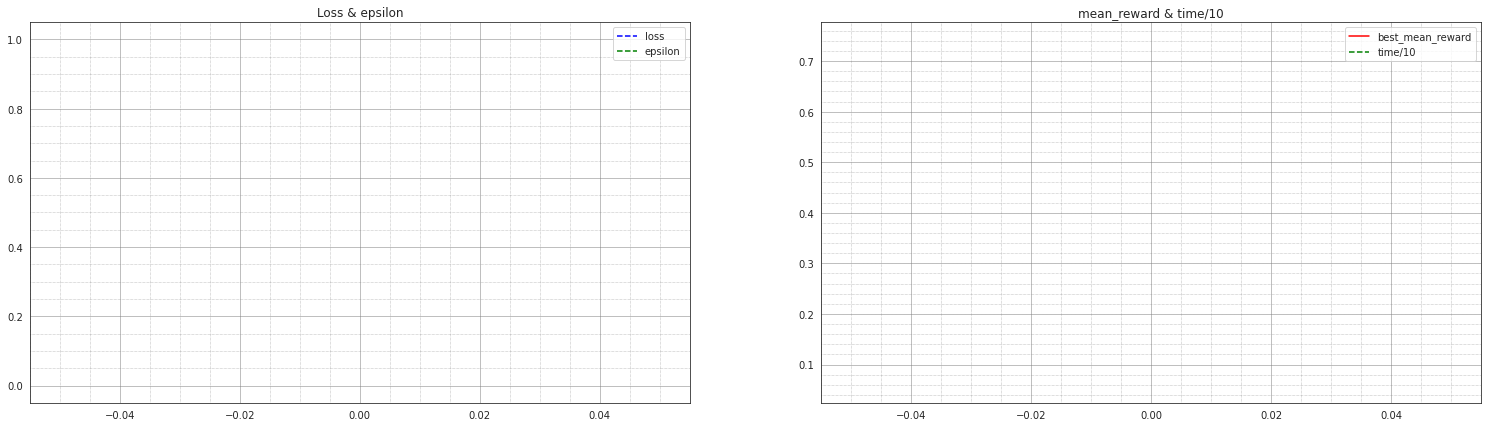

game_episode: 000000000010, turn: 0000453, epsilon: 0.999, mean reward: 0.743, rewards in row 3.4650, loss: 0.0000, replay_buffer 3533, time: 0.3500 sec
game_episode: 000000000020, turn: 0000863, epsilon: 0.998, mean reward: 0.778, rewards in row 4.2075, loss: 0.0000, replay_buffer 5627, time: 0.2655 sec
game_episode: 000000000030, turn: 0001197, epsilon: 0.997, mean reward: 0.766, rewards in row 3.7125, loss: 0.0000, replay_buffer 9141, time: 0.5319 sec
game_episode: 000000000040, turn: 0001613, epsilon: 0.996, mean reward: 0.761, rewards in row 4.9500, loss: 8.8067, replay_buffer 11653, time: 0.0760 sec
game_episode: 000000000050, turn: 0001953, epsilon: 0.995, mean reward: 0.762, rewards in row 5.4450, loss: 4.3717, replay_buffer 14357, time: 0.0686 sec
game_episode: 000000000060, turn: 0002349, epsilon: 0.994, mean reward: 0.751, rewards in row 5.4450, loss: 1.9556, replay_buffer 17111, time: 0.1404 sec
game_episode: 000000000070, turn: 0002735, epsilon: 0.994, mean reward: 0.756, 

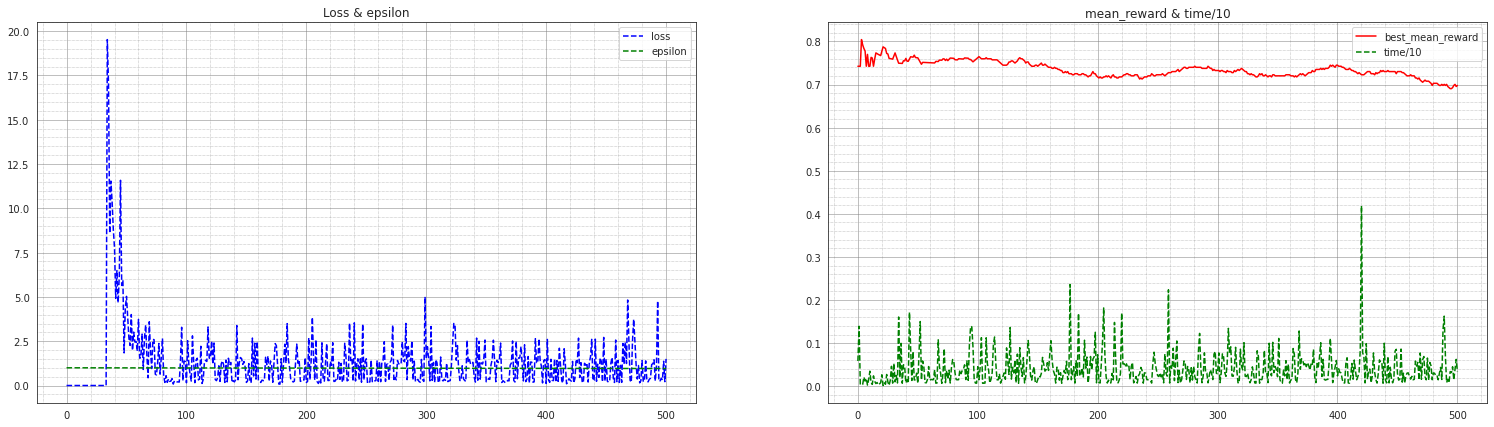

game_episode: 000000000510, turn: 0020085, epsilon: 0.958, mean reward: 0.708, rewards in row 3.9600, loss: 0.4600, replay_buffer 124264, time: 0.2340 sec
game_episode: 000000000520, turn: 0020396, epsilon: 0.957, mean reward: 0.728, rewards in row 4.2075, loss: 0.4021, replay_buffer 127381, time: 0.7532 sec
game_episode: 000000000530, turn: 0020755, epsilon: 0.956, mean reward: 0.730, rewards in row 4.9500, loss: 0.1708, replay_buffer 129599, time: 0.0792 sec
game_episode: 000000000540, turn: 0021176, epsilon: 0.955, mean reward: 0.723, rewards in row 3.7125, loss: 1.4732, replay_buffer 131838, time: 0.5320 sec
game_episode: 000000000550, turn: 0021604, epsilon: 0.955, mean reward: 0.725, rewards in row 4.4550, loss: 0.3248, replay_buffer 133825, time: 0.4169 sec
game_episode: 000000000560, turn: 0021996, epsilon: 0.954, mean reward: 0.725, rewards in row 4.2075, loss: 1.2339, replay_buffer 135326, time: 0.2267 sec
game_episode: 000000000570, turn: 0022472, epsilon: 0.954, mean reward

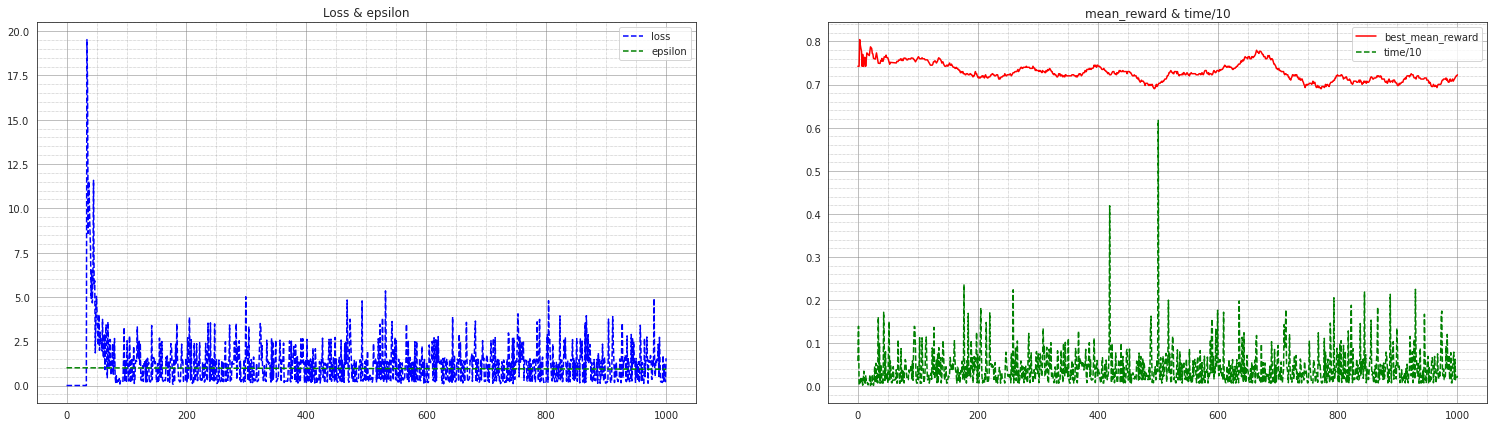

game_episode: 000000001010, turn: 0039642, epsilon: 0.920, mean reward: 0.705, rewards in row 3.9600, loss: 1.3982, replay_buffer 241059, time: 0.2253 sec
game_episode: 000000001020, turn: 0040050, epsilon: 0.920, mean reward: 0.708, rewards in row 4.9500, loss: 0.3491, replay_buffer 242369, time: 0.2226 sec
game_episode: 000000001030, turn: 0040441, epsilon: 0.919, mean reward: 0.713, rewards in row 4.7025, loss: 1.3177, replay_buffer 244973, time: 0.2300 sec
game_episode: 000000001040, turn: 0040826, epsilon: 0.918, mean reward: 0.725, rewards in row 4.4550, loss: 1.4214, replay_buffer 247176, time: 0.0815 sec
game_episode: 000000001050, turn: 0041198, epsilon: 0.917, mean reward: 0.738, rewards in row 4.7025, loss: 0.4546, replay_buffer 250318, time: 0.0784 sec
game_episode: 000000001060, turn: 0041546, epsilon: 0.916, mean reward: 0.740, rewards in row 4.2075, loss: 1.5281, replay_buffer 253311, time: 0.0783 sec
game_episode: 000000001070, turn: 0041884, epsilon: 0.915, mean reward

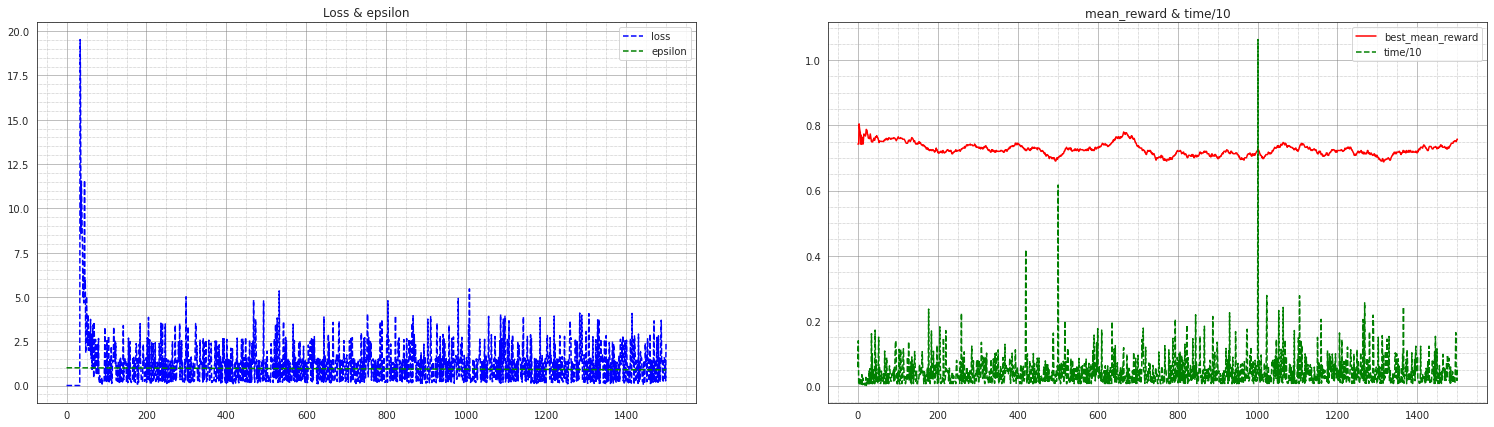

game_episode: 000000001510, turn: 0059468, epsilon: 0.884, mean reward: 0.740, rewards in row 5.1975, loss: 1.6579, replay_buffer 357432, time: 0.1072 sec
game_episode: 000000001520, turn: 0059851, epsilon: 0.883, mean reward: 0.733, rewards in row 3.2175, loss: 0.2515, replay_buffer 360815, time: 1.0348 sec
game_episode: 000000001530, turn: 0060269, epsilon: 0.882, mean reward: 0.730, rewards in row 4.7025, loss: 0.1532, replay_buffer 362568, time: 0.5142 sec
game_episode: 000000001540, turn: 0060644, epsilon: 0.881, mean reward: 0.743, rewards in row 4.2075, loss: 1.5508, replay_buffer 365430, time: 0.5034 sec
game_episode: 000000001550, turn: 0061041, epsilon: 0.881, mean reward: 0.750, rewards in row 5.1975, loss: 0.1930, replay_buffer 367412, time: 0.2443 sec
game_episode: 000000001560, turn: 0061469, epsilon: 0.880, mean reward: 0.752, rewards in row 5.4450, loss: 4.0932, replay_buffer 369658, time: 0.2760 sec
game_episode: 000000001570, turn: 0061856, epsilon: 0.879, mean reward

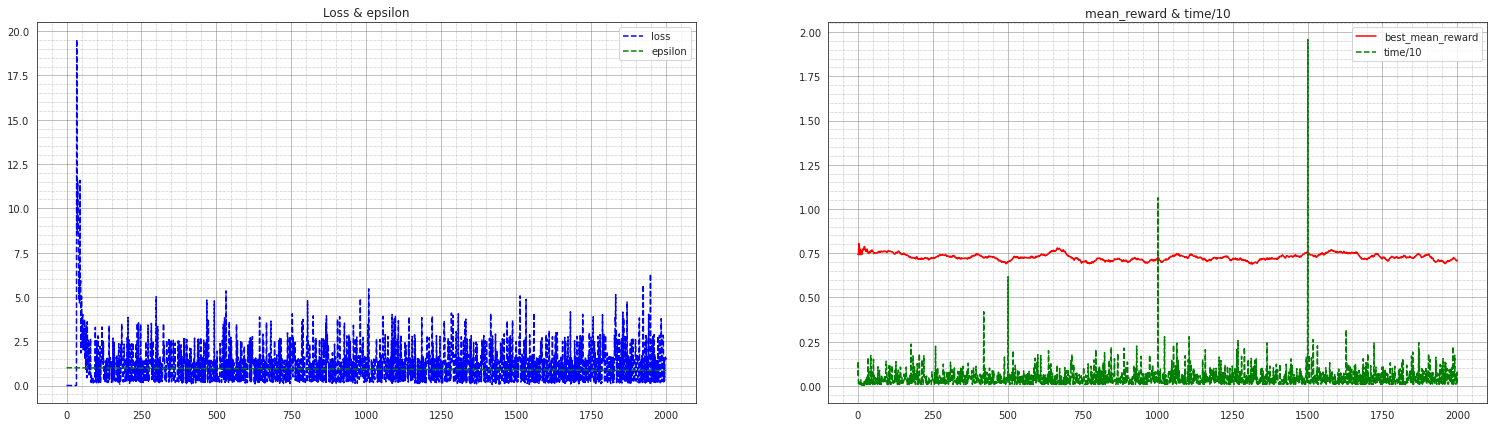

game_episode: 000000002010, turn: 0079137, epsilon: 0.849, mean reward: 0.713, rewards in row 4.9500, loss: 0.2893, replay_buffer 472004, time: 0.2252 sec
game_episode: 000000002020, turn: 0079559, epsilon: 0.848, mean reward: 0.725, rewards in row 3.2175, loss: 0.5367, replay_buffer 475126, time: 1.3370 sec
game_episode: 000000002030, turn: 0080006, epsilon: 0.848, mean reward: 0.740, rewards in row 3.7125, loss: 0.4188, replay_buffer 477196, time: 1.2418 sec
game_episode: 000000002040, turn: 0080495, epsilon: 0.847, mean reward: 0.728, rewards in row 3.7125, loss: 2.0361, replay_buffer 480120, time: 0.8836 sec
game_episode: 000000002050, turn: 0080949, epsilon: 0.846, mean reward: 0.725, rewards in row 3.7125, loss: 0.3120, replay_buffer 482262, time: 0.0852 sec
game_episode: 000000002060, turn: 0081339, epsilon: 0.846, mean reward: 0.730, rewards in row 4.2075, loss: 0.1711, replay_buffer 484387, time: 0.1846 sec
game_episode: 000000002070, turn: 0081681, epsilon: 0.845, mean reward

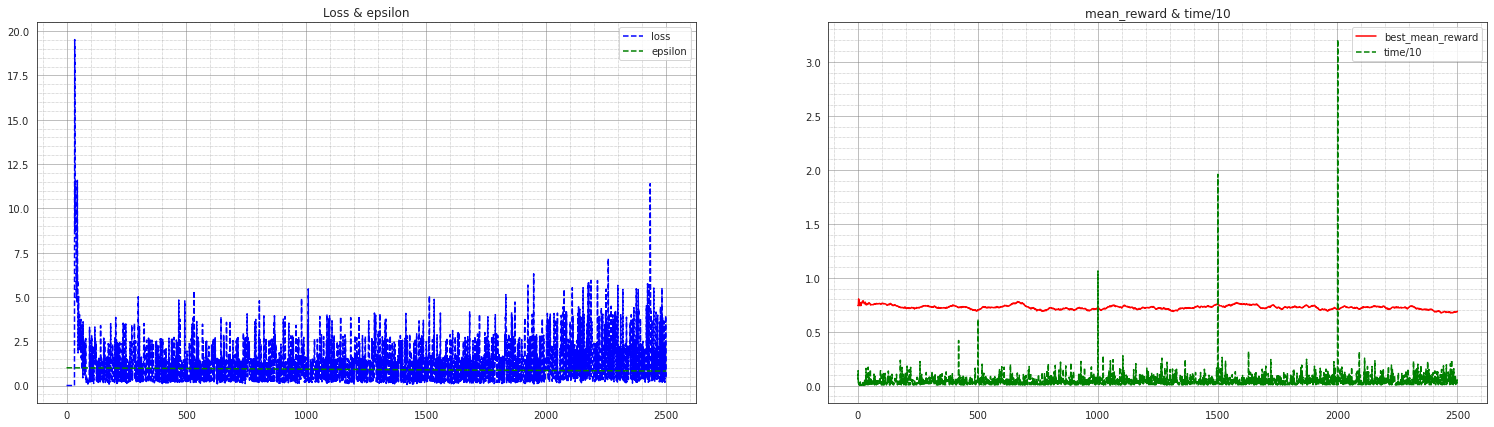

game_episode: 000000002510, turn: 0099190, epsilon: 0.815, mean reward: 0.695, rewards in row 4.2075, loss: 0.9509, replay_buffer 594756, time: 0.6996 sec
game_episode: 000000002520, turn: 0099578, epsilon: 0.814, mean reward: 0.693, rewards in row 3.7125, loss: 0.6092, replay_buffer 597779, time: 0.7547 sec
game_episode: 000000002530, turn: 0100008, epsilon: 0.813, mean reward: 0.708, rewards in row 4.7025, loss: 5.7843, replay_buffer 600185, time: 0.6834 sec
game_episode: 000000002540, turn: 0100402, epsilon: 0.812, mean reward: 0.720, rewards in row 4.2075, loss: 0.6818, replay_buffer 602319, time: 0.4646 sec
game_episode: 000000002550, turn: 0100797, epsilon: 0.812, mean reward: 0.723, rewards in row 3.9600, loss: 3.1268, replay_buffer 604760, time: 0.2107 sec
game_episode: 000000002560, turn: 0101226, epsilon: 0.811, mean reward: 0.733, rewards in row 3.9600, loss: 3.0167, replay_buffer 607170, time: 0.2865 sec
game_episode: 000000002570, turn: 0101708, epsilon: 0.811, mean reward

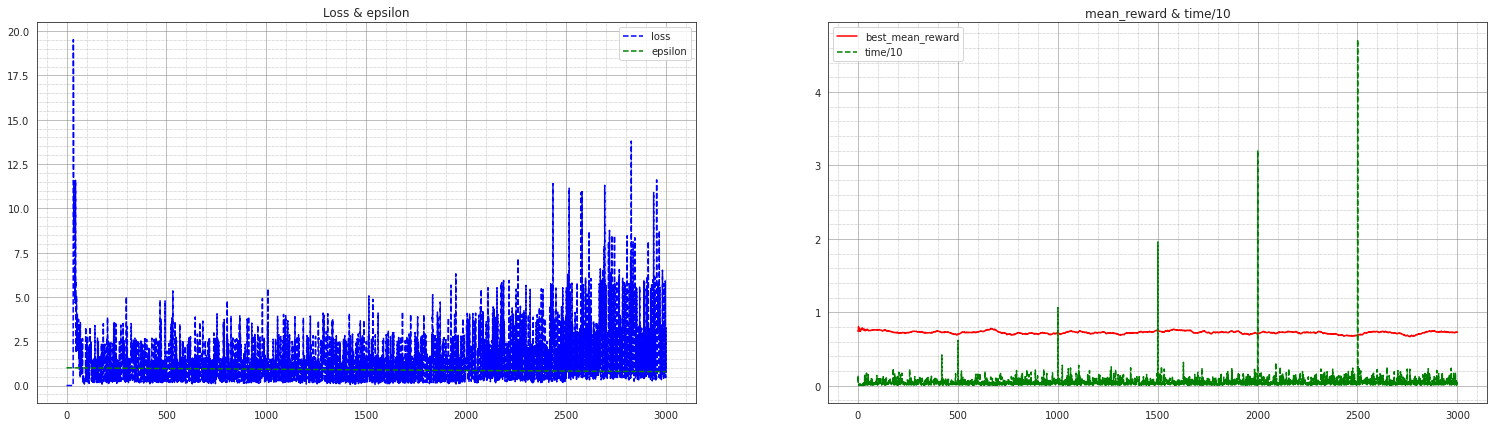

game_episode: 000000003010, turn: 0119162, epsilon: 0.782, mean reward: 0.718, rewards in row 3.9600, loss: 3.9617, replay_buffer 712739, time: 0.2792 sec
game_episode: 000000003020, turn: 0119577, epsilon: 0.782, mean reward: 0.713, rewards in row 5.6925, loss: 10.3948, replay_buffer 714172, time: 0.2443 sec
game_episode: 000000003030, turn: 0120028, epsilon: 0.781, mean reward: 0.710, rewards in row 3.4650, loss: 4.4203, replay_buffer 717795, time: 0.8048 sec
game_episode: 000000003040, turn: 0120421, epsilon: 0.780, mean reward: 0.705, rewards in row 3.7125, loss: 3.1506, replay_buffer 719560, time: 0.6957 sec
game_episode: 000000003050, turn: 0120815, epsilon: 0.780, mean reward: 0.705, rewards in row 3.9600, loss: 6.8449, replay_buffer 721134, time: 0.6149 sec
game_episode: 000000003060, turn: 0121167, epsilon: 0.779, mean reward: 0.720, rewards in row 3.9600, loss: 4.2874, replay_buffer 724555, time: 0.4809 sec
game_episode: 000000003070, turn: 0121507, epsilon: 0.778, mean rewar

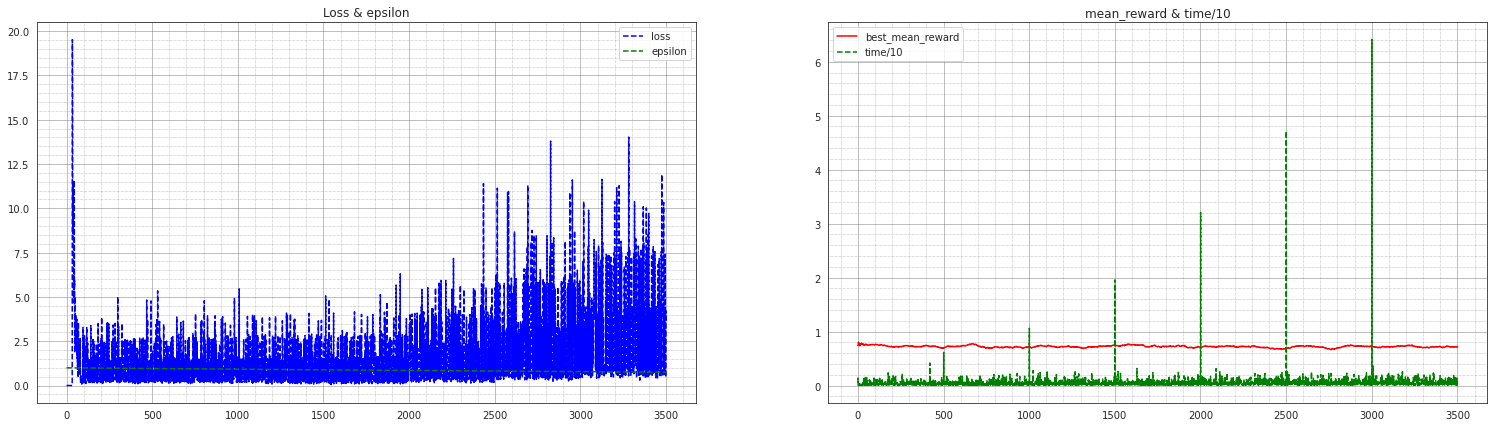

game_episode: 000000003510, turn: 0139006, epsilon: 0.749, mean reward: 0.718, rewards in row 3.4650, loss: 1.0862, replay_buffer 837844, time: 2.2787 sec
game_episode: 000000003520, turn: 0139421, epsilon: 0.748, mean reward: 0.703, rewards in row 3.7125, loss: 8.8583, replay_buffer 840291, time: 0.2563 sec
game_episode: 000000003530, turn: 0139841, epsilon: 0.748, mean reward: 0.688, rewards in row 4.4550, loss: 0.6955, replay_buffer 843395, time: 0.3204 sec
game_episode: 000000003540, turn: 0140225, epsilon: 0.747, mean reward: 0.673, rewards in row 3.9600, loss: 8.5826, replay_buffer 846835, time: 0.4026 sec
game_episode: 000000003550, turn: 0140593, epsilon: 0.746, mean reward: 0.678, rewards in row 4.2075, loss: 5.1133, replay_buffer 849057, time: 0.2084 sec
game_episode: 000000003560, turn: 0141028, epsilon: 0.746, mean reward: 0.671, rewards in row 4.2075, loss: 4.3588, replay_buffer 851208, time: 0.1053 sec
game_episode: 000000003570, turn: 0141408, epsilon: 0.745, mean reward

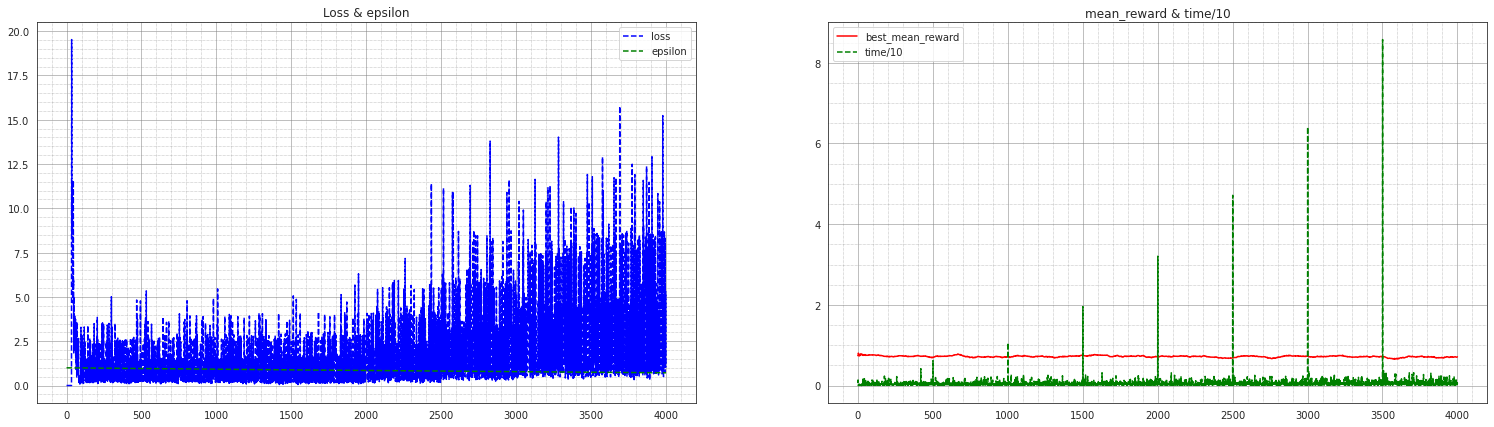

game_episode: 000000004010, turn: 0159392, epsilon: 0.717, mean reward: 0.710, rewards in row 3.4650, loss: 5.3043, replay_buffer 964908, time: 1.8753 sec
game_episode: 000000004020, turn: 0159764, epsilon: 0.717, mean reward: 0.705, rewards in row 4.9500, loss: 5.4590, replay_buffer 966994, time: 0.3930 sec
game_episode: 000000004030, turn: 0160200, epsilon: 0.716, mean reward: 0.691, rewards in row 4.9500, loss: 8.1899, replay_buffer 968671, time: 0.2914 sec
game_episode: 000000004040, turn: 0160575, epsilon: 0.716, mean reward: 0.695, rewards in row 4.4550, loss: 0.5961, replay_buffer 971352, time: 0.2551 sec
game_episode: 000000004050, turn: 0161014, epsilon: 0.715, mean reward: 0.695, rewards in row 4.4550, loss: 11.8036, replay_buffer 974568, time: 0.6580 sec
game_episode: 000000004060, turn: 0161427, epsilon: 0.715, mean reward: 0.683, rewards in row 4.7025, loss: 5.1707, replay_buffer 975876, time: 0.4288 sec
game_episode: 000000004070, turn: 0161836, epsilon: 0.713, mean rewar

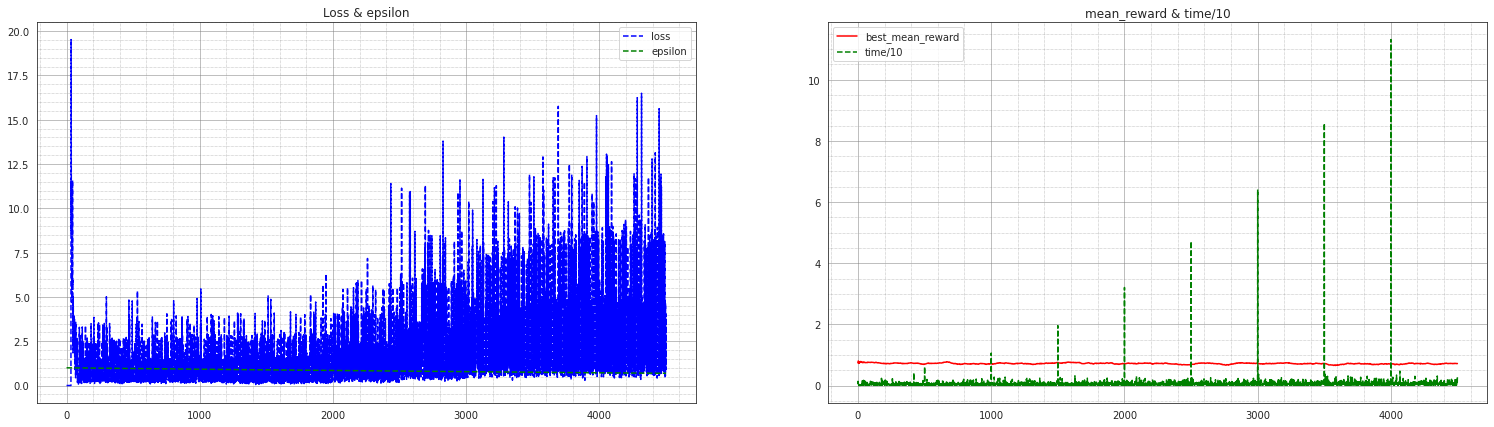

game_episode: 000000004510, turn: 0179171, epsilon: 0.689, mean reward: 0.723, rewards in row 4.2075, loss: 3.9246, replay_buffer 1082930, time: 1.4326 sec
game_episode: 000000004520, turn: 0179557, epsilon: 0.688, mean reward: 0.730, rewards in row 3.7125, loss: 0.7441, replay_buffer 1085978, time: 0.2782 sec
game_episode: 000000004530, turn: 0180023, epsilon: 0.687, mean reward: 0.733, rewards in row 4.2075, loss: 0.4847, replay_buffer 1088223, time: 1.0043 sec
game_episode: 000000004540, turn: 0180382, epsilon: 0.687, mean reward: 0.723, rewards in row 3.7125, loss: 4.7258, replay_buffer 1090085, time: 0.1230 sec
game_episode: 000000004550, turn: 0180787, epsilon: 0.686, mean reward: 0.730, rewards in row 3.9600, loss: 4.7611, replay_buffer 1093824, time: 0.4631 sec
game_episode: 000000004560, turn: 0181173, epsilon: 0.685, mean reward: 0.730, rewards in row 3.7125, loss: 0.9055, replay_buffer 1096561, time: 0.6319 sec
game_episode: 000000004570, turn: 0181592, epsilon: 0.685, mean 

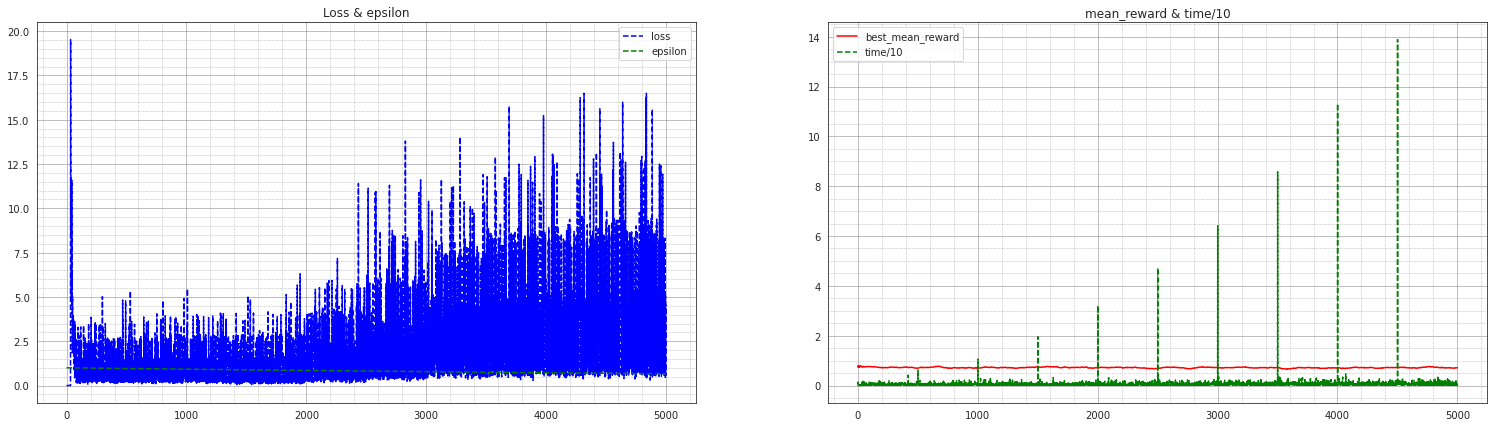

game_episode: 000000005010, turn: 0198933, epsilon: 0.661, mean reward: 0.715, rewards in row 3.7125, loss: 5.5135, replay_buffer 1203343, time: 1.5341 sec
game_episode: 000000005020, turn: 0199305, epsilon: 0.660, mean reward: 0.715, rewards in row 4.4550, loss: 5.3688, replay_buffer 1206944, time: 0.4404 sec
game_episode: 000000005030, turn: 0199675, epsilon: 0.659, mean reward: 0.713, rewards in row 4.2075, loss: 9.5457, replay_buffer 1209705, time: 0.3626 sec
game_episode: 000000005040, turn: 0200033, epsilon: 0.659, mean reward: 0.715, rewards in row 4.4550, loss: 1.1752, replay_buffer 1211135, time: 0.9634 sec
game_episode: 000000005050, turn: 0200340, epsilon: 0.658, mean reward: 0.735, rewards in row 3.7125, loss: 5.3299, replay_buffer 1213590, time: 2.1444 sec
game_episode: 000000005060, turn: 0200802, epsilon: 0.658, mean reward: 0.735, rewards in row 4.4550, loss: 13.4968, replay_buffer 1216316, time: 0.1343 sec
game_episode: 000000005070, turn: 0201204, epsilon: 0.657, mean

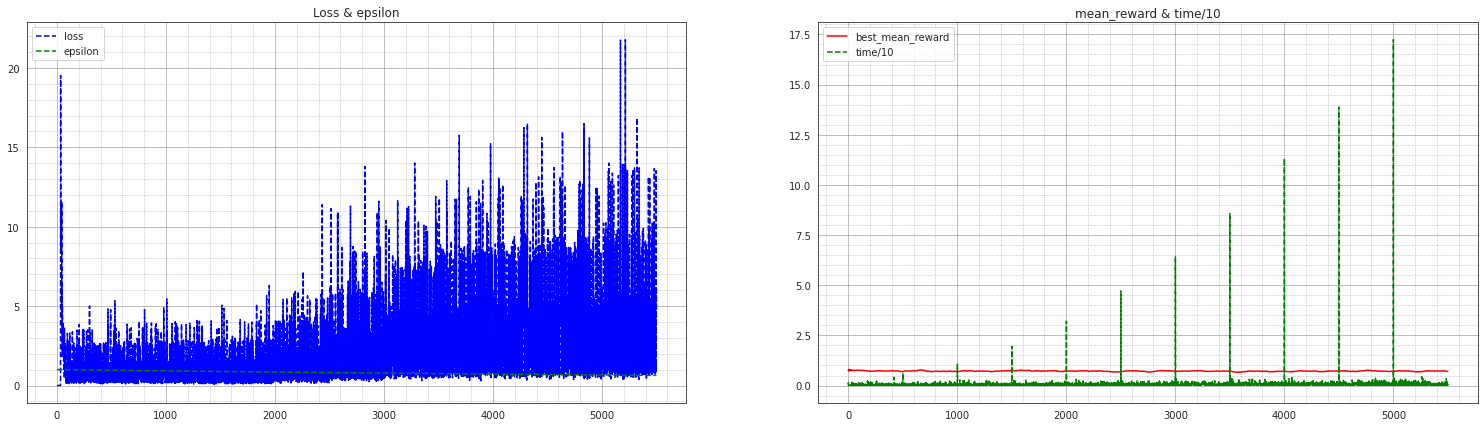

game_episode: 000000005510, turn: 0218828, epsilon: 0.635, mean reward: 0.700, rewards in row 4.9500, loss: 9.4174, replay_buffer 1316720, time: 1.5482 sec
game_episode: 000000005520, turn: 0219211, epsilon: 0.635, mean reward: 0.700, rewards in row 4.4550, loss: 0.8964, replay_buffer 1318987, time: 0.2778 sec
game_episode: 000000005530, turn: 0219611, epsilon: 0.635, mean reward: 0.691, rewards in row 4.2075, loss: 14.4010, replay_buffer 1320537, time: 0.6503 sec
game_episode: 000000005540, turn: 0220035, epsilon: 0.634, mean reward: 0.683, rewards in row 5.1975, loss: 5.8853, replay_buffer 1323725, time: 0.2814 sec
game_episode: 000000005550, turn: 0220445, epsilon: 0.633, mean reward: 0.668, rewards in row 4.9500, loss: 1.4568, replay_buffer 1325927, time: 0.2364 sec
game_episode: 000000005560, turn: 0220851, epsilon: 0.633, mean reward: 0.676, rewards in row 4.7025, loss: 4.5839, replay_buffer 1329037, time: 0.1419 sec
game_episode: 000000005570, turn: 0221283, epsilon: 0.633, mean

KeyboardInterrupt: ignored

In [9]:
# optimizer = keras.optimizers.Adam(learning_rate=0.00025) # added back clipnorm (was deleted)
# loss_funct = tf.keras.losses.Huber(delta=1.2)   # changet at epoch 1100 from 1.3
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, clipnorm=1.0)
# optimizer = keras.optimizers.SGD(learning_rate=learning_rate,
#                                   momentum=0.9,
#                                   nesterov=True) # added back clipnorm (was deleted
# optimizer = Adam(learning_rate=learning_rate)
# loss_funct = tf.keras.losses.Huber(delta=1.5)   # changet at epoch 1100 from 1.3

# optimizer = Adam(lr=learning_rate)
loss_funct = tf.keras.losses.Huber()

# model.compile(optimizer = optimizer,
#               loss = loss_funct,
#               metrics=['mean_square_error'])

# model_target.compile(optimizer = optimizer,
#                     loss = loss_funct,
#                     metrics=['mean_square_error'])

# agent = Agent(env, buffer)

best_mean_reward = None
num_actions = 37
loss_numpy = 0
loss = 0
rewards_in_row = []
start_datetime = datetime.now(timezone)
print(">>>Training starts at ", start_datetime)
start_time = time.time()
while True:
        epsilon = max(epsilon*eps_decay, eps_min)
        reward = game_table.train_episode_AI(start_type='next', model=model, epsilon=epsilon)
        rewards_in_row.append(reward)
        if len(rewards_in_row) > 12:
          del rewards_in_row[:1]
        if reward > 0.4:
            buffer.extend(game_table.pl[2].episode_buffer)
            game_episode += 1
            turn_idx += game_table.game_turns
            total_rewards.append(reward)
            mean_reward = np.mean(total_rewards[-100:])
            if len(total_rewards) > 100:
              del total_rewards[:1]
            msg = f"\rgame_episode: {game_episode:012d}, turn: {turn_idx:07d}, epsilon: {epsilon:.3f}, " \
                  f"mean reward: {mean_reward:.3f}, rewards in row {np.sum(rewards_in_row[-12:]):.4f}, loss: {loss_numpy:.4f}, " \
                  f"replay_buffer {len(buffer)}"
         
            if best_mean_reward is None or best_mean_reward < mean_reward:
                best_mean_reward = mean_reward
                if best_mean_reward is not None:
                    msg = f'{msg}. Best mean reward updated {best_mean_reward:.3f}'

            if mean_reward > MEAN_REWARD_BOUND:
                end_time = time.time()
                game_time = end_time - start_time 
                start_time  = time.time()


                print(f'{msg}, time: {game_time:.4f} sec')    
                print("Solved in %d turns!" % turn_idx)
                if tf.is_tensor(loss):
                   loss_numpy = tf.keras.backend.get_value(loss)
                df = add_data_to_pd(df, game_episode, turn_idx, game_time, loss_numpy, epsilon, mean_reward)
                df.to_csv(os.path.join(HOME, history_csv_name), encoding='utf-8')
                break
            
            if tf.is_tensor(loss):
                loss_numpy = tf.keras.backend.get_value(loss)    

            end_time = time.time()
            game_time = end_time - start_time 
            start_time  = time.time()
            if game_episode % 10 == 0:
              print(f'{msg}, time: {game_time:.4f} sec')
            df = add_data_to_pd(df, game_episode, turn_idx, game_time, loss_numpy, epsilon, mean_reward)
            if (game_episode % 200 == 0) and (game_episode != 0):
                df.to_csv(os.path.join(HOME, history_csv_name), encoding='utf-8')
            if (game_episode % 500 == 0) and (game_episode != 0) and (turn_idx >= replay_start_size):
                print('Saving weights...')
                model.save_weights(os.path.join(HOME, f'{model_weights_save_name}_{game_episode:002d}.h5'))
                buffer.save(exp_file_path)
            if game_episode % 500 == 0:
                figshow(df)
            elif (game_episode % 1500 == 0) and (game_episode != 0):  
                clear_output()
                print(df.tail(50).to_string())
                figshow(df)

        if len(buffer) < replay_start_size:
            continue

        batch = buffer.sample(batch_size)
        states, actions, rewards, dones, next_states = batch

        # Build the updated Q-values for the sampled future states
        # Use the target model for stability
        future_rewards = model_target.predict(next_states)
        # Q value = reward + discount factor * expected future reward
        updated_q_values = rewards + gamma * tf.reduce_max(
            future_rewards, axis=1
        )

        # If final turn set the last value to -1
        updated_q_values = updated_q_values * (1 - dones) - dones

        # Create a mask so we only calculate loss on the updated Q-values
        masks = tf.one_hot(actions, num_actions)

        with tf.GradientTape() as tape:
            # Train the model on the states and updated Q-values
            q_values = model(states)

            # Apply the masks to the Q-values to get the Q-value for action taken
            q_action = tf.reduce_sum(tf.multiply(q_values, masks), axis=1)
            # Calculate loss between new Q-value and old Q-value
            loss = loss_funct(updated_q_values, q_action)

        # Backpropagation
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        if turn_idx % sync_target_turns == 0:
            # update the the target network with new weights
            model_target.set_weights(model.get_weights())

print('Saving weights...')
model.save_weights(os.path.join(HOME, f'{model_weights_save_name}_{game_episode:002d}.h5'))
buffer.save(exp_file_path)
figshow(df)

end_datetime = datetime.now(timezone)
print(">>>Training ends at ", end_datetime)
train_time = start_datetime-end_datetime
print(f'Model trained:', timedelta(hours=train_time))


## Сыграем эпизод обученной моделью и воспроизведем видео

In [ ]:
from datetime import datetime, timedelta
from IPython.display import clear_output 

num_actions = 4
model_weights_save_name = 'q_deep_model_weights'
optimizer = Adam(lr=0.0001)
loss_funct = tf.keras.losses.Huber()

model = create_q_model(num_actions)

model.compile(optimizer = optimizer,
              loss = loss_funct,
              metrics=['mean_absolute_error'])
 
def load_checkpoint(model, save_name):
    start_game = 0
    dirlist = os.listdir(HOME)
    for i in range (len(dirlist)):
      filename = dirlist[i]
      if save_name in filename:
        if '_' in filename: 
          try: 
            epoch = int((filename.split('_')[-1]).split('.')[-2])
          except ValueError:
            epoch = 0
          if epoch > start_game:
            start_game = epoch

    if start_game > 0:
      file_path = os.path.join(HOME, f'{save_name}_{start_game}.h5')
      
      model.load_weights(file_path)
      print(f"Loaded {file_path} save. Last game {start_game}")
      # last epoch +1
    else:
      print(f"Weights not found!")
    return model, start_game

model, start_game = load_checkpoint(model, model_weights_save_name)

Loaded /content/drive/MyDrive/Colab Notebooks/data/dz32/q-deep/q_deep_model_weights_2100.h5 save. Last game 2100


In [ ]:
###########################
# Импорт библиотек для записи и воспроизведения видео
###########################
!pip install pyvirtualdisplay > /dev/null 2>&1 
# Устанавливаем виртуальный дисплей pyvirtualdisplay; "/dev/null 2>&1" уберёт длинный вывод в строке output
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1 # создает вирт.дисплей в памяти(нужен для работы дисплея в ноутбуке)
# "apt-get..." - установка пакета программного обеспечения
# "...-y..." автоматический "yes" на вопрос "вы действительно хотите это установить?" 
# "...xvfb..." - бэкенд для pyvirtualdisplay - сервер, который выполняет все графические операции в памяти без вывода на экран
# "...python-opengl..." - поддержка графики с помощью графической библиотеки
# "...ffmpeg" - пакеты для обработки/конвертирования видеофайла из одного формата в другой
 
# from gym.wrappers import Monitor # класс Monitor из пакета функций-обёрток в gym активирует видеозапись игры
import glob   # модуль возвращает список путей к видео по шаблону (для удобства поиска/воспроизведения текущего видео)
import base64 # библиотека поможет нам закодировать видео в 64-разрядный код, и без повреждений/изменений открыть его в ноутбуке через HTML
 
from IPython.display import HTML              # загружаем модуль чтобы обратиться к HTML для открытия закодированного видео 
from IPython import display as ipythondisplay # активирует дисплей для воспроизведения видео в интерфейсе ноутбука
from pyvirtualdisplay import Display          # модуль для активации виртуального дисплея
display = Display(visible=0, size=(1400, 900))# запустим невидимый виртуальный дисплей
display.start()

In [ ]:
###########################
# Задаем функции записи и воспроизведения видео
###########################
def wrapEnv(env):                           # зададим функцию-обёртку над средой
  env = gym.wrappers.Monitor(env, './video', force=True) # класс Monitor будет записывать игру в видеофайл
  return env                                # теперь вызов среды через функцию wrapEnv будет запускать видеозапись
 
def showVideo():                            # функция для воспроизведения видео в ноутбуке
  mp4list = glob.glob('video/*.mp4')        # возвращает список путей к видео по этому шаблону
  if len(mp4list) > 0:                      # если по этому пути нашелся хотя бы один файл
    mp4 = mp4list[0]                        # то берём самый свежий файл
    video = open(mp4, 'r+b').read()         # открываем в режиме чтения/записи бинарного файла
    encoded = base64.b64encode(video)       # кодируем видео в 64-разрядный код 
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    # Декодируем ascii формат в видео mp4 - "format(encoded.decode('ascii'))))"
    # для воспроизведения на разных браузерах - "<source src="data:video/mp4"
    # задаём высоту экрана 400px - "height: 400px;"
    # активируем элементы управления в видео(типа кнопки паузы и т.п) - "controls"
    # включаем автоповтор после окончания воспроизведения - "loop"
    # видео автоматически воспроизведется по готовности - "autoplay"
    # текстовая альтернатива описывающая объект в случае невозможности отображения - "alt="test""
    
  else:                           # если путь не нашелся 
    print("Could not find video") # то выведем на печать, что не смог найти видео

In [ ]:
DEFAULT_ENV_NAME ='Pong-v0'
def play_episode(model): # подаем на вход функции модель нейросети
    FPS = 25
    env = make_env(DEFAULT_ENV_NAME)
    env = wrapEnv(env)              # создаем среду в режиме записи
    
    done = False                       # игровой эпизод не завершён
    # observation = env.reset()          # задаем начальное состояние среды, которое наблюдает агент
    # newObservation = observation       # задали новое состояние которое наблюдает агент
    state = env.reset()
    total_reward = 0.0
    while done == False:               # пока игровой эпизод не завершён
        start_ts = time.time()
        env.render() 
        state_a = np.array(state, copy=False)
        state_tensor = tf.convert_to_tensor(state_a)
        state_tensor = tf.expand_dims(state_tensor, 0)
        action_probs = model.predict(state_tensor)
        # Take best action
        action = tf.argmax(action_probs[0]).numpy()

        state, reward, done, _ = env.step(action)
        total_reward += reward

        if done:
            break
        delta = 1/FPS - (time.time() - start_ts)
        if delta > 0:
            time.sleep(delta)
        # env.render()                   # запускаем воспроизведение среды
    env.close() # закрываем игровую среду после окончания игры
    print(f'Total reward: {total_reward:.2f}')
    showVideo() # показать видео игры

In [ ]:
# Взглянем как сыграет сетка, обученная на 1910 тренировках
# model.load_weights(os.path.join(HOME, f'{model_weights_save_name}_1140.h5')) # подгружаем модель из сохранённых
play_episode(model)                     # запускаем игровой эпизод

Total reward: 17.00
